Primero importamos las librerías necesarias para realizar el EDA y posterior visualización.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
test = pd.read_excel('E-Commerce_test.xlsx')

Analizamos los datos que tenemos en test

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2000 non-null   int64 
 1   Warehouse_block      2000 non-null   object
 2   Mode_of_Shipment     2000 non-null   object
 3   Customer_care_calls  2000 non-null   int64 
 4   Customer_rating      2000 non-null   int64 
 5   Cost_of_the_Product  2000 non-null   int64 
 6   Prior_purchases      2000 non-null   int64 
 7   Product_importance   2000 non-null   object
 8   Gender               2000 non-null   object
 9   Discount_offered     2000 non-null   int64 
 10  Weight_in_gms        2000 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 172.0+ KB


Observamos que en test tenemos 2000 filas y 11 dimensiones

Verificamos si que no tenemos nulos 

In [6]:
test.isna().sum().sort_values(ascending = False)

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
dtype: int64

In [7]:
train = pd.read_excel('E-Commerce_train.xlsx')

In [10]:
train

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8994,8995,D,Ship,3,1,217,3,low,F,1,4177,1
8995,8996,F,Ship,5,3,232,3,medium,M,3,4526,0
8996,8997,A,Ship,4,5,260,3,medium,F,6,4221,0
8997,8998,B,Ship,4,2,184,3,medium,F,5,5931,1


En train tenemos 8999 filas y 12 dimensiones. Vamos a verificar primero si tenemos duplicados en ambos datasets

In [8]:
train[train.duplicated()]

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N


In [9]:
test[test.duplicated()]

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms


In [26]:
print ('Registros duplicados en train:' , train.duplicated().sum(),'.', 'Registros duplicados en test:' ,test.duplicated().sum())


Registros duplicados en train: 0 . Registros duplicados en test: 0


Ya hemos comprobado que no tenemos valores faltantes ni nulos. Ahora identificaremos valores atípicos y los trataremos.

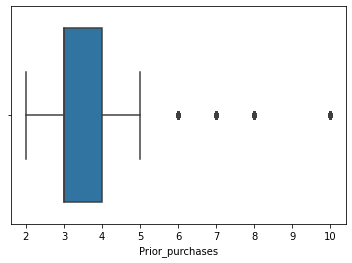

In [10]:

sns.boxplot(x = 'Prior_purchases', data = train)
plt.show()


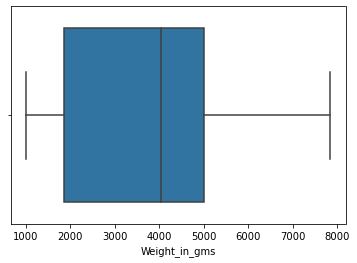

In [11]:
sns.boxplot(x = 'Weight_in_gms', data = train)
plt.show()


In [12]:
train.Weight_in_gms.min()

1001

In [13]:
train.Weight_in_gms.max()

7846

Comprobaremos outliers con la técnica del rango intercuartílico.

In [14]:
Q1 = train['Weight_in_gms'].quantile(0.25)
Q3 = train['Weight_in_gms'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR

print(Q1)
print(Q3)
print(IQR)
print(BI)
print(BS)

1857.0
4999.5
3142.5
-2856.75
9713.25


In [15]:
print('Cantidad de registros totales:', train.shape[0])
print('Cantidad de outliers:', train[(train['Weight_in_gms']<BI) | (train['Weight_in_gms']>BS)].shape[0] )

Cantidad de registros totales: 8999
Cantidad de outliers: 0


In [16]:
Q1 = train['Prior_purchases'].quantile(0.25)
Q3 = train['Prior_purchases'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR

print(Q1)
print(Q3)
print(IQR)
print(BI)
print(BS)

3.0
4.0
1.0
1.5
5.5


In [17]:
print('Cantidad de registros totales:', train.shape[0])
print('Cantidad de outliers:', train[(train['Prior_purchases']<BI) | (train['Prior_purchases']>BS)].shape[0] )

Cantidad de registros totales: 8999
Cantidad de outliers: 798


In [18]:
outliers_Prior_purchases = (train['Prior_purchases']<BI) | (train['Prior_purchases']>BS) 

train = train[~outliers_Prior_purchases]


In [19]:
print('Tamaño de train, luego de eliminar outliers en Prior_purchases:', train.shape[0])

Tamaño de train, luego de eliminar outliers en Prior_purchases: 8201


Visualizamos nuevamente para comprobar que luego de esta primera eliminación de outliers, se redujeron los valores extremos

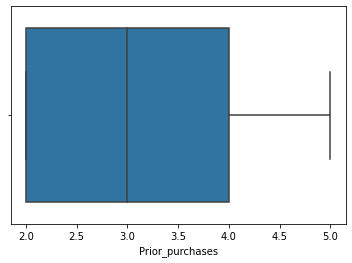

In [20]:
sns.boxplot(x = 'Prior_purchases', data = train)
plt.show()

In [23]:
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

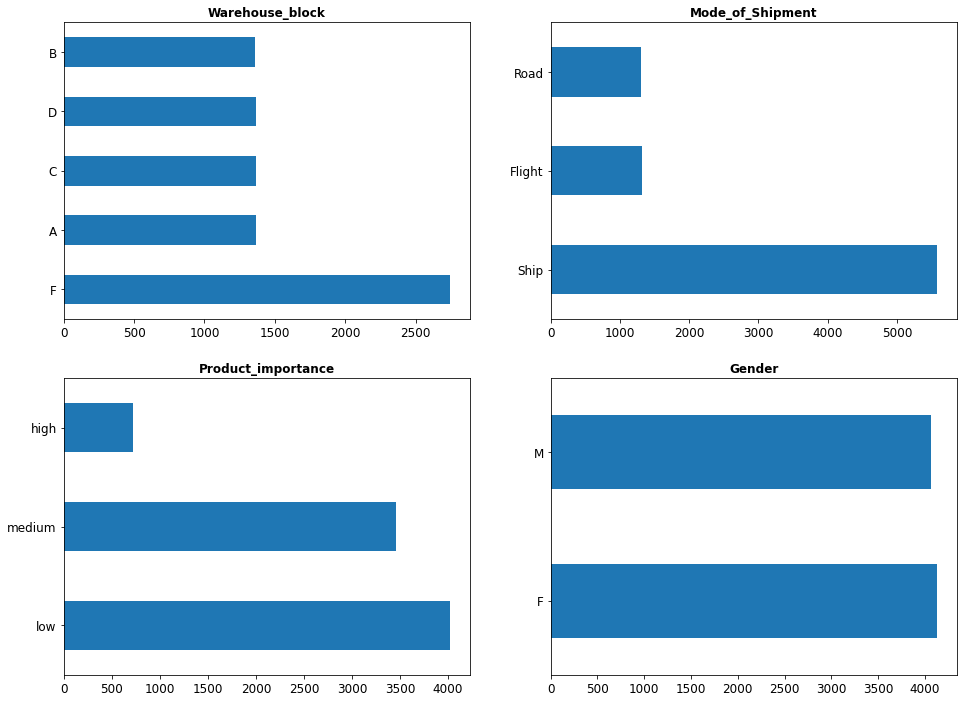

In [24]:
graficos_eda_categoricos(train.select_dtypes('O'))

## Ahora hacemos una exploración de las variables numéricas

In [25]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [26]:
estadisticos_cont(train.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
ID,8201.0,4478.167175,4468.0,2601.822287,1.0,2234.0,4468.0,6711.0,8999.0
Customer_care_calls,8201.0,4.015852,4.0,1.146253,2.0,3.0,4.0,5.0,7.0
Customer_rating,8201.0,2.990367,3.0,1.414655,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,8201.0,208.581271,210.0,48.276594,96.0,168.0,210.0,250.0,310.0
Prior_purchases,8201.0,3.151079,3.0,0.940667,2.0,2.0,3.0,4.0,5.0
Discount_offered,8201.0,15.145104,8.0,17.432243,1.0,4.0,8.0,19.0,65.0
Weight_in_gms,8201.0,3573.337886,4031.0,1618.266791,1001.0,1842.0,4031.0,4997.0,7846.0
Reached.on.Time_Y.N,8201.0,0.636142,1.0,0.481138,0.0,0.0,1.0,1.0,1.0


## GENERACIÓN DE INSIGHTS
Cuantificación del problema. Que porcentaje de envíos no llegan a tiempo?

In [32]:
train['Reached.on.Time_Y.N'].value_counts(normalize = True) * 100

1    63.614193
0    36.385807
Name: Reached.on.Time_Y.N, dtype: float64

## Empezando con nuestro modelo de ML

In [44]:
train_ml= train.copy()
train_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8201 entries, 0 to 8998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   8201 non-null   int64 
 1   Warehouse_block      8201 non-null   object
 2   Mode_of_Shipment     8201 non-null   int64 
 3   Customer_care_calls  8201 non-null   int64 
 4   Customer_rating      8201 non-null   int64 
 5   Cost_of_the_Product  8201 non-null   int64 
 6   Prior_purchases      8201 non-null   int64 
 7   Product_importance   8201 non-null   object
 8   Gender               8201 non-null   object
 9   Discount_offered     8201 non-null   int64 
 10  Weight_in_gms        8201 non-null   int64 
 11  Reached.on.Time_Y.N  8201 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 832.9+ KB


## Vamos a transformar todas nuestras variables categóricas a numéricas

In [45]:
from sklearn.preprocessing import OneHotEncoder

#Categóricas
cat = train_ml.select_dtypes('O')

#Instanciamos
ohe = OneHotEncoder(sparse = False)

#Entrenamos
ohe.fit(cat)

#Aplicamos
cat_ohe = ohe.transform(cat)

#Ponemos los nombres
cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names_out(input_features = cat.columns)).reset_index(drop = True)

In [48]:
cat_ohe

,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8196,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
8197,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
8198,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
8199,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


### Dataframe final


Seleccionamos las variables numéricas para poder juntarlas a las cat_hoe y las juntamos todas en el dataframe final

In [50]:
num = train.select_dtypes('number').reset_index(drop = True)

In [51]:
train_ml = pd.concat([cat_ohe,num], axis = 1)
train_ml

,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M,ID,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1,2,4,2,177,3,44,1233,1
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,2,2,4,5,216,2,59,3088,1
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3,2,2,2,183,4,48,3374,1
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4,2,3,3,176,4,10,1177,1
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,5,2,2,2,184,3,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8196,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,8995,3,3,1,217,3,1,4177,1
8197,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,8996,3,5,3,232,3,3,4526,0
8198,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,8997,3,4,5,260,3,6,4221,0
8199,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,8998,3,4,2,184,3,5,5931,1


### Diseño de la modelización. Separación predictoras y target

In [52]:
x = train_ml.drop(columns='Reached.on.Time_Y.N')
y = train_ml['Reached.on.Time_Y.N']

Separamos en train y test

In [53]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3) 

Entrenamos el modelo sobre train

In [54]:
from sklearn.tree import DecisionTreeClassifier

#Instanciar
ac = DecisionTreeClassifier(max_depth=4)

#Entrenar
ac.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=4)

Predicción y validación sobre test

In [55]:
# Predicción
pred = ac.predict_proba(test_x)[:, 1]
pred[:20]

array([0.46068796, 0.46068796, 0.47605634, 0.46068796, 0.46068796,
       0.46068796, 1.        , 1.        , 1.        , 0.46068796,
       1.        , 0.47605634, 1.        , 1.        , 0.39967374,
       1.        , 0.37297297, 1.        , 0.29900332, 1.        ])

In [56]:
# Evaluación
from sklearn.metrics import roc_auc_score

roc_auc_score(test_y,pred)

0.7745907761294898

Interpretación - Diagrama del árbol

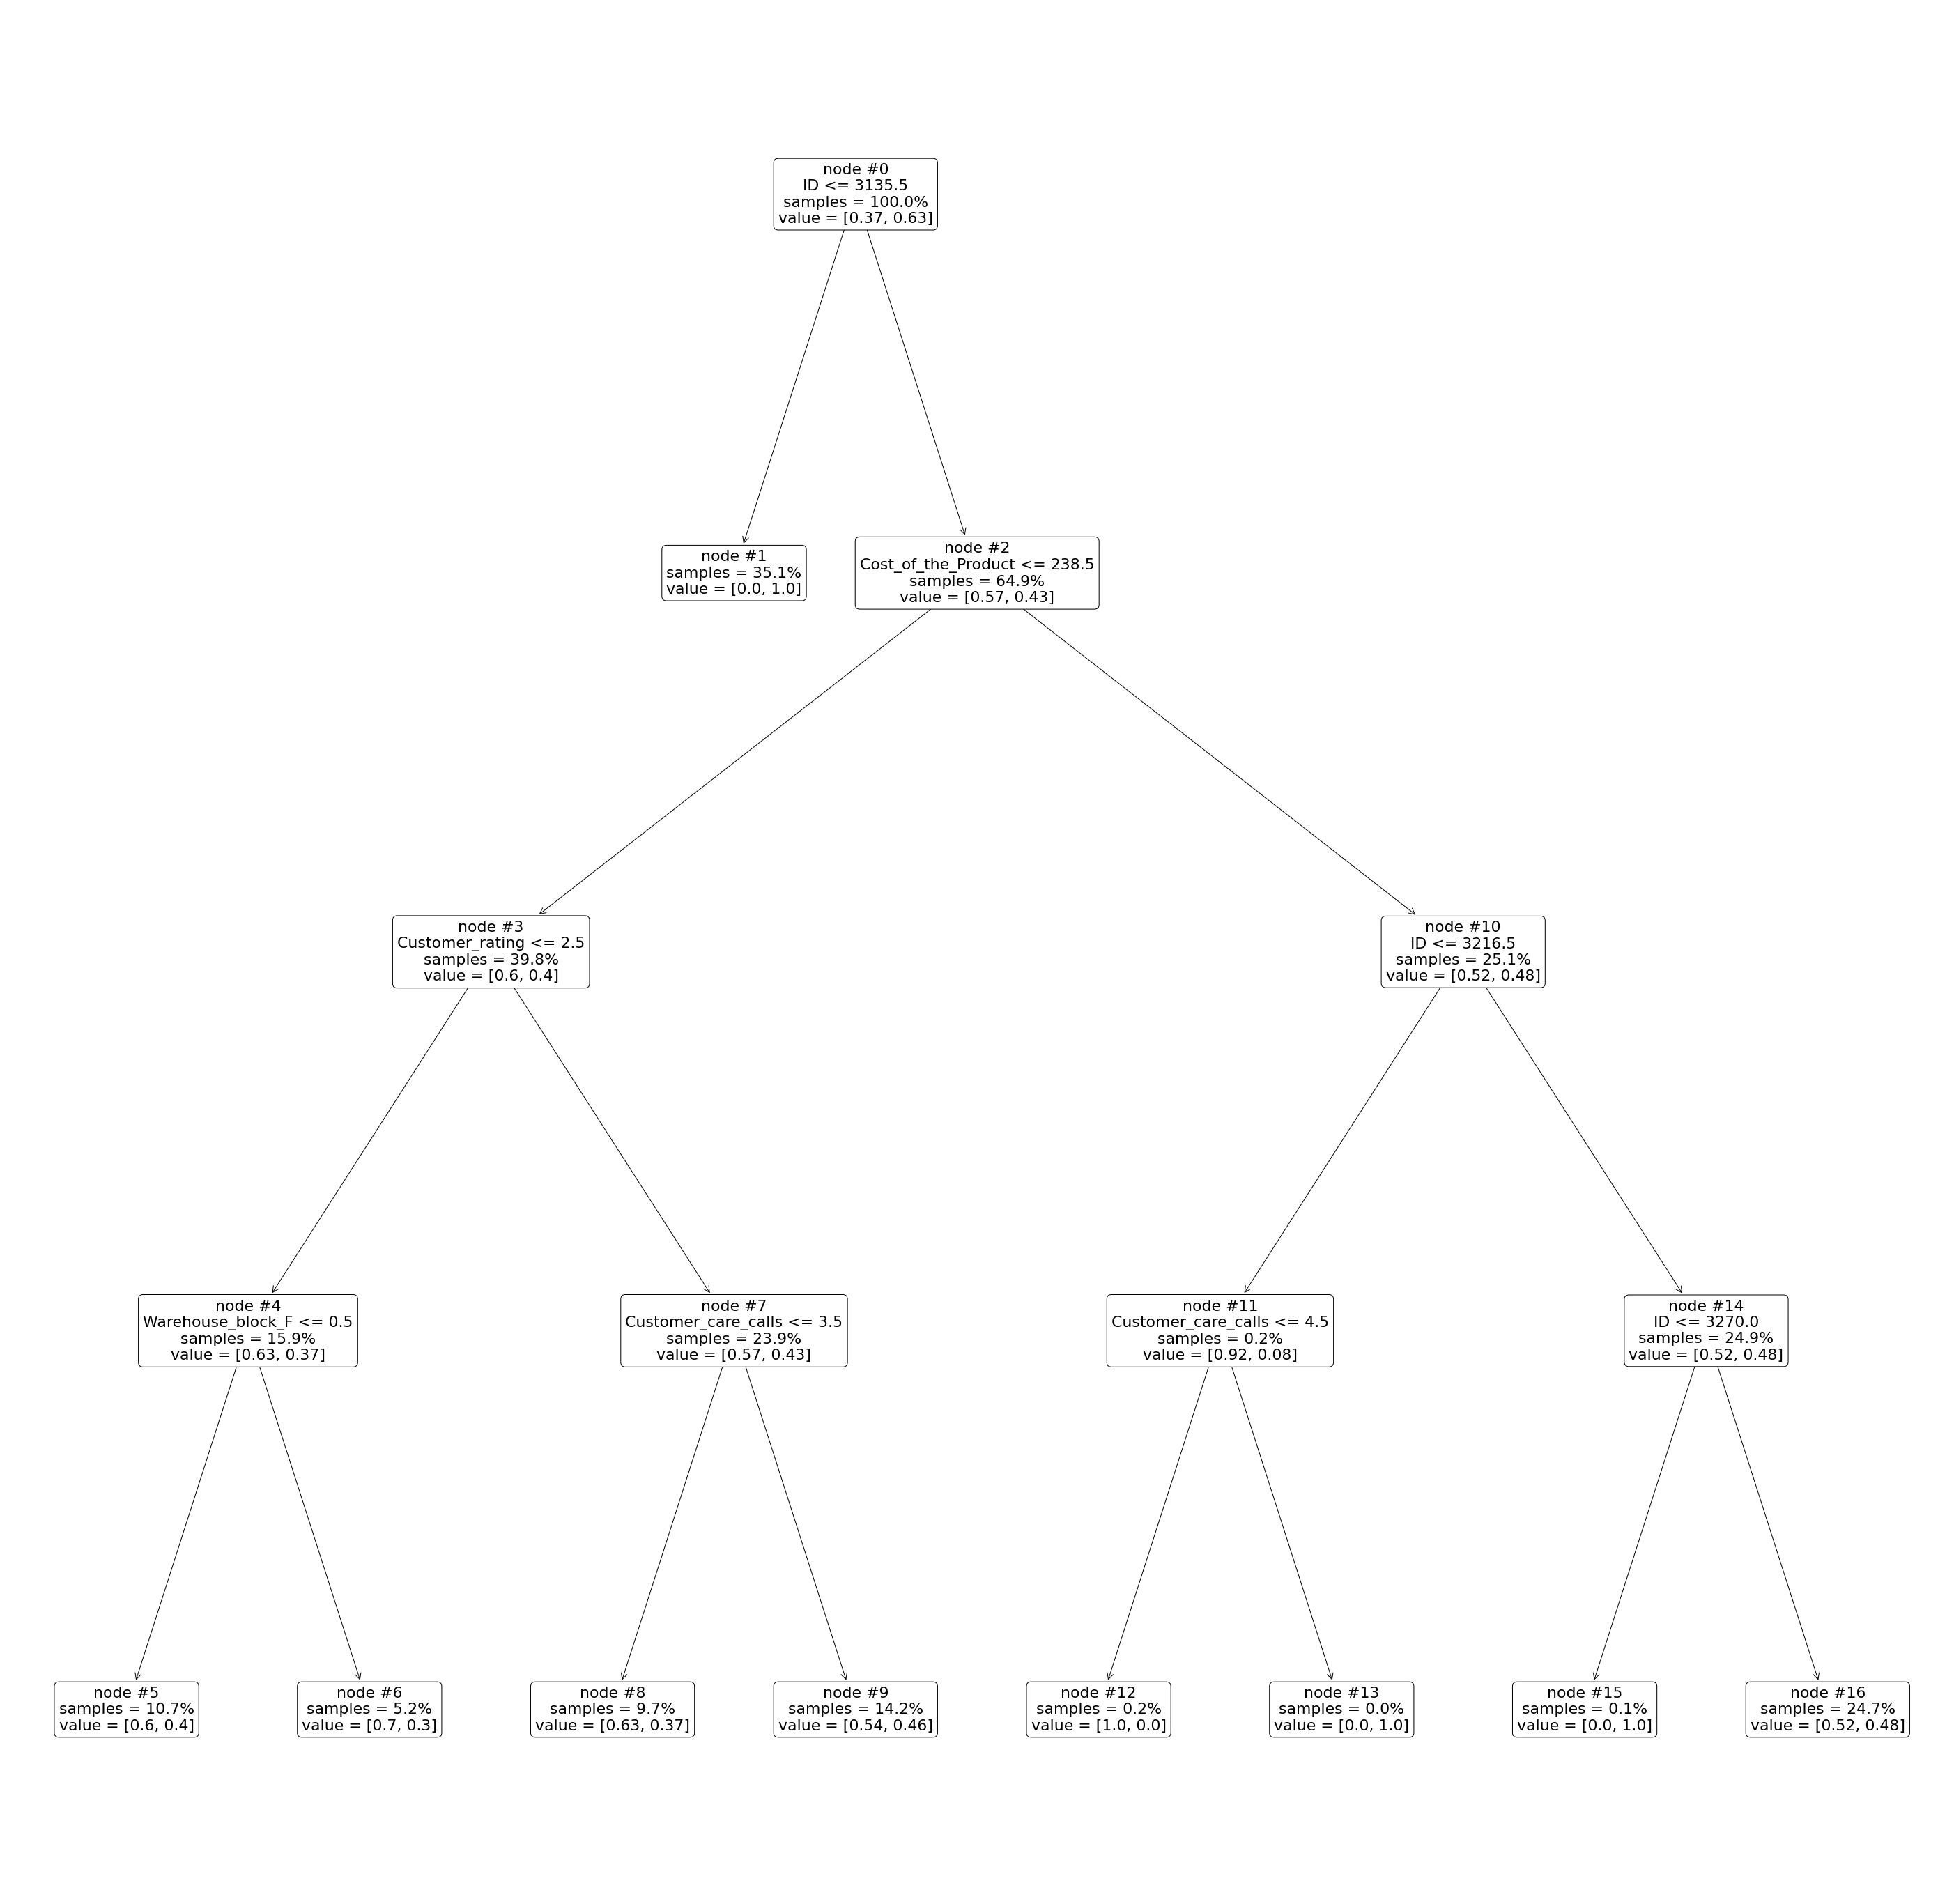

In [57]:
from sklearn.tree import plot_tree

plt.figure(figsize = (50,50))

plot_tree(ac,
          feature_names= test_x.columns,
          impurity = False,
          node_ids = True,
          proportion = True,
          rounded = True,
          precision = 2);

Importancia de las variables

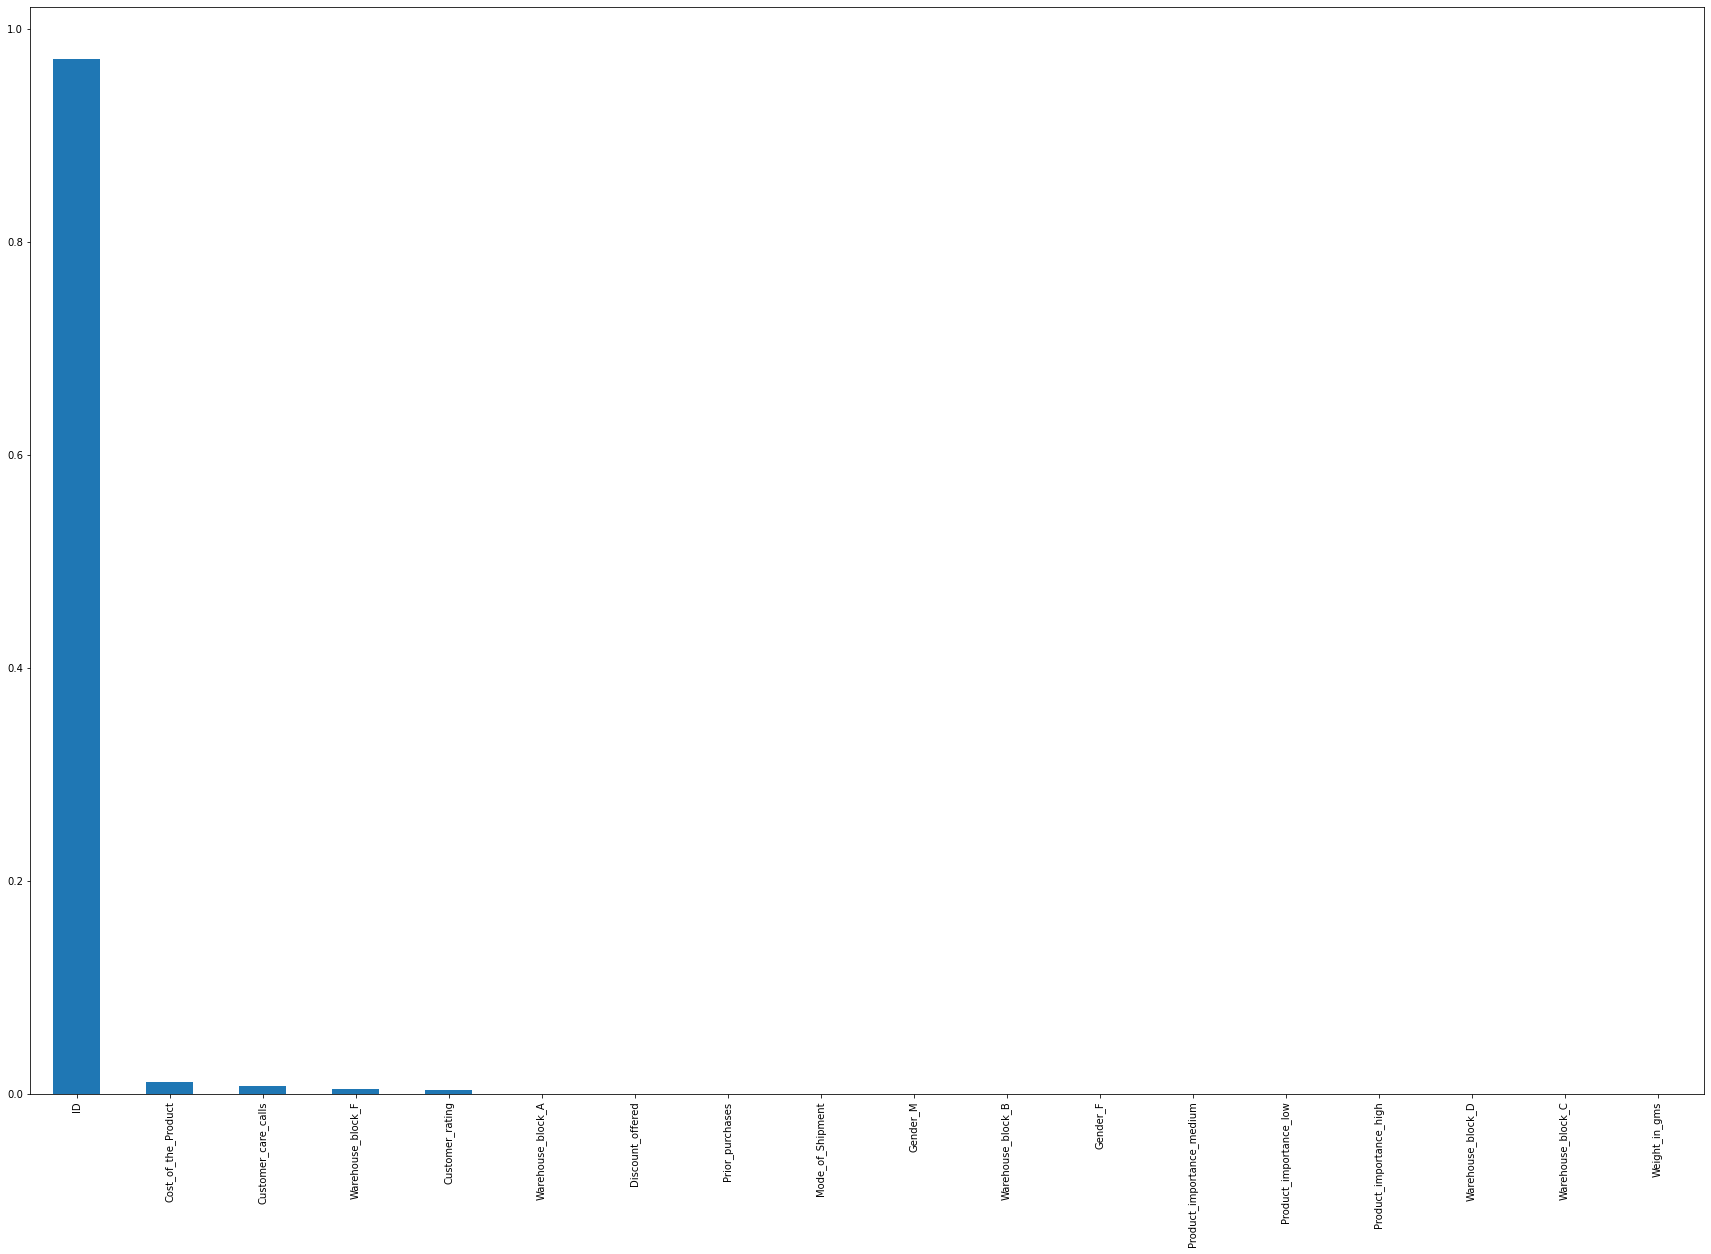

In [58]:
pd.Series(ac.feature_importances_,index = test_x.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (30,20));

Incorporamos el scoring al dataframe principal

In [62]:


train.drop(columns='scoring_entrega', inplace=True)

In [63]:
train['pred'] = ac.predict_proba(train_ml.drop(columns = 'Reached.on.Time_Y.N'))[:, 1]
train

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,pred
0,1,D,2,4,2,177,3,low,F,44,1233,1,1.000000
1,2,F,2,4,5,216,2,low,M,59,3088,1,1.000000
2,3,A,2,2,2,183,4,low,M,48,3374,1,1.000000
3,4,B,2,3,3,176,4,medium,M,10,1177,1,1.000000
4,5,C,2,2,2,184,3,medium,F,46,2484,1,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8994,8995,D,3,3,1,217,3,low,F,1,4177,1,0.399674
8995,8996,F,3,5,3,232,3,medium,M,3,4526,0,0.460688
8996,8997,A,3,4,5,260,3,medium,F,6,4221,0,0.476056
8997,8998,B,3,4,2,184,3,medium,F,5,5931,1,0.399674


Guardamos el resultado e imprimimos solo la columna pred sin índice

In [64]:
train.to_excel('entregas_con_scoring.xlsx')

In [68]:
pred = train.filter(['pred'],axis=1)

In [69]:
pred.style.hide_index()


pred
1.000000
1.000000
1.000000
1.000000
1.000000
1.000000
1.000000
1.000000
1.000000
1.000000
